In [1]:
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from konlpy.tag import Komoran
from PIL import Image
import numpy as np
komoran = Komoran(max_heap_size = 1024)
%config InlineBackend.figure_format='retina'

In [3]:
# 파일로드
with open('부산여행지.txt', 'r',encoding='utf8') as f:   
     s = f.read()    

In [4]:
# 글자만
word1 = " ".join(re.findall("[a-zA-Z가-힣]+", s))

In [5]:
# 요약
word_list = komoran.nouns(word1)
print('명사 출현 수 : ',len(word_list))
print('출현 명사 종류 수 : ', len(set(word_list)))
print('한 단어당 평균 반복 횟수 : ',len(word_list)/len(set(word_list)))

명사 출현 수 :  37283
출현 명사 종류 수 :  5038
한 단어당 평균 반복 횟수 :  7.400357284636761


In [6]:
## 고유명사만
tagged_data = komoran.pos(word1)
data3=[t[0] for t in tagged_data if (t[1]=='NNP')]
len(data3)

13690

In [7]:
## 워드클라우드 대상
text = ' '.join(data3)

In [8]:
## 불용어

## 불용어
stopwords = set(['곳','것','서울','사람','사진','모습','여행지','추천','생각','입구','때','지금','장소','시간','길','제가','아이들','보니','존','무료','대구','장','만','라고','한국','주차','조명','이','그런지','감사','전','주차장','여행','부산'])

In [9]:
## 마스키## 마스킹
img = Image.open('부산지도.png').convert('RGBA')
# png : 'RGBA' , jpg : 'RGB'
mask = Image.new('RGB',img.size,(0,0,0)) # 마스킹베이스
mask.paste(img) # 마스킹복사
mask = np.array(mask) # 넘파이배열로 변환

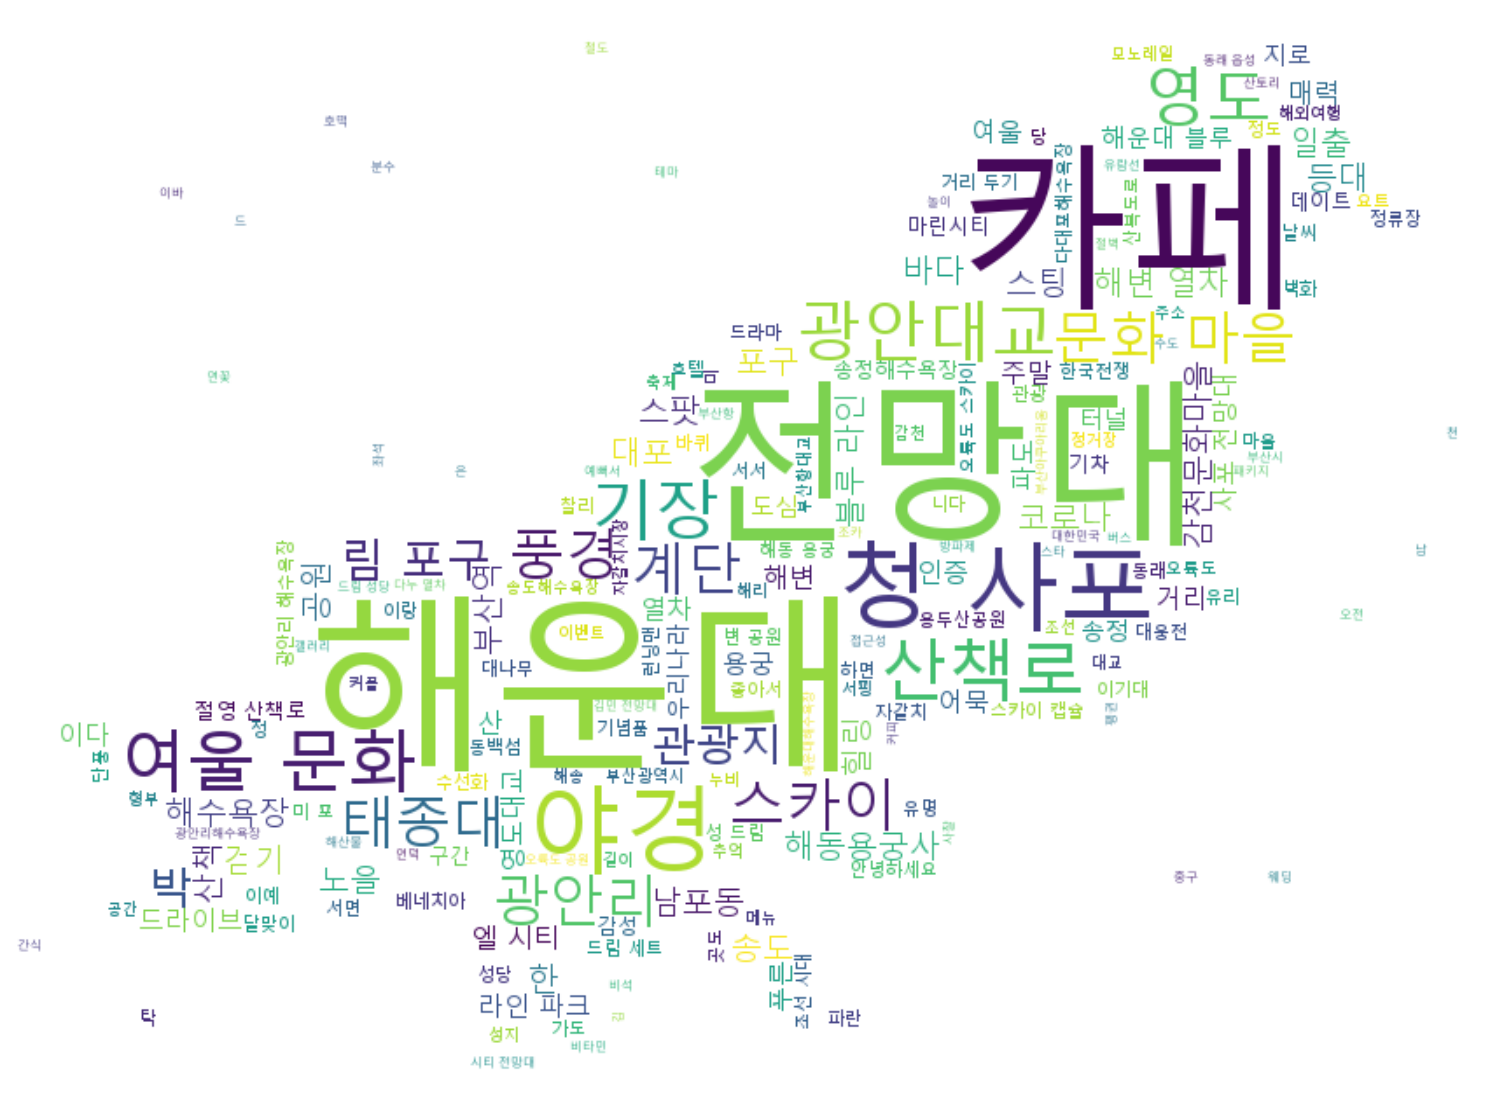

In [11]:
# 워드 클라우드 설정 
wordc = WordCloud(background_color='white',
                  stopwords=stopwords,
                  max_words=200,
                  mask=mask,
                  font_path='c:/Windows/Fonts/malgun.ttf',
                  relative_scaling=0.2)
wordc.generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordc, interpolation='bilinear')
plt.axis('off')
plt.show()
#plt.savefig('부산워클.png',bbox_inches='tight', pad_inches=0.5) 